In [2]:
from collections import defaultdict

import matplotlib.pyplot as plt
from keras import models, layers
from keras.utils import to_categorical
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras

groups = fetch_20newsgroups()

2023-01-31 12:05:23.951107: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 12:05:24.252591: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-31 12:05:24.281081: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-31 12:05:24.281096: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
data_train = fetch_20newsgroups(subset='train', random_state=21)
train_labels = data_train.target
data_test = fetch_20newsgroups(subset='test', random_state=21)
test_labels = data_test.target
len(data_train.data), len(data_test.data), len(test_labels)

(11314, 7532, 7532)

In [4]:
all_names = names.words()
WNL = WordNetLemmatizer()


def clean(data):
    cleaned = defaultdict(list)
    count = 0
    for group in data:
        for words in group.split():
            if words.isalpha() and words not in all_names:
                cleaned[count].append(WNL.lemmatize(words.lower()))
        cleaned[count] = ' '.join(cleaned[count])
        count += 1
    return (list(cleaned.values()))

In [5]:
x_train = clean(data_train.data)
x_test = clean(data_test.data)

In [6]:
tf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = tf.fit_transform(x_train)
X_train = X_train.astype("float32")
X_test = tf.transform(x_test)
X_test = X_test.astype("float32")
X_train.shape, X_test.shape

((11314, 10000), (7532, 10000))

In [6]:
train_labels_oneHot = to_categorical(train_labels)
test_labels_oneHot = to_categorical(test_labels)

In [7]:
def compile_train_plot_conf(network, train_x, train_y, test_x, test_y, batch_size=128):
    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    history = network.fit(x=train_x,
                          y=train_y,
                          epochs=20,
                          batch_size=batch_size,
                          validation_data=(test_x, test_y),
                          workers=-1)
    print(history.history.keys())

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # ConfusionMatrix
    # from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    # import numpy as np
    # from matplotlib.pyplot import figure
    # y_prediction = network.predict(test_x)
    # y_prediction = np.argmax(y_prediction, axis=1)
    # test_y = np.argmax(test_y, axis=1)
    # Create confusion matrix and normalizes it over predicted (columns)
    # cm = confusion_matrix(test_y, y_prediction, normalize='pred')
    # print(cm)
    # figure(figsize=(240, 240), dpi=80)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=groups.target_names)
    # disp.plot(cmap=plt.cm.Blues)
    # plt.savefig(f"{network}.png")
    # plt.show()



# Testing different NN architectures

Epoch 1/20


2023-01-24 12:05:26.505312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 12:05:26.505501: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-24 12:05:26.505920: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-24 12:05:26.505946: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-24 12:05:26.506181: W tensorflow/c

89/89 [==============================] - 1s 9ms/step - loss: 2.4413 - accuracy: 0.5314 - val_loss: 1.7569 - val_accuracy: 0.6156
Epoch 2/20
89/89 [==============================] - 1s 7ms/step - loss: 1.1798 - accuracy: 0.7353 - val_loss: 1.2264 - val_accuracy: 0.6411
Epoch 3/20
89/89 [==============================] - 1s 7ms/step - loss: 0.8031 - accuracy: 0.7849 - val_loss: 1.1319 - val_accuracy: 0.6470
Epoch 4/20
89/89 [==============================] - 1s 6ms/step - loss: 0.6450 - accuracy: 0.8204 - val_loss: 1.1210 - val_accuracy: 0.6482
Epoch 5/20
89/89 [==============================] - 1s 7ms/step - loss: 0.5453 - accuracy: 0.8493 - val_loss: 1.1304 - val_accuracy: 0.6447
Epoch 6/20
89/89 [==============================] - 1s 7ms/step - loss: 0.4712 - accuracy: 0.8712 - val_loss: 1.1513 - val_accuracy: 0.6399
Epoch 7/20
89/89 [==============================] - 1s 7ms/step - loss: 0.4143 - accuracy: 0.8917 - val_loss: 1.1757 - val_accuracy: 0.6423
Epoch 8/20
89/89 [=============

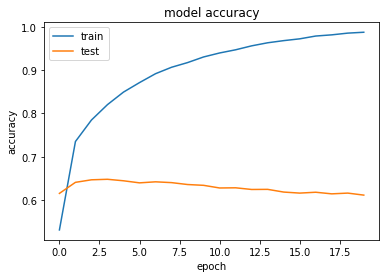

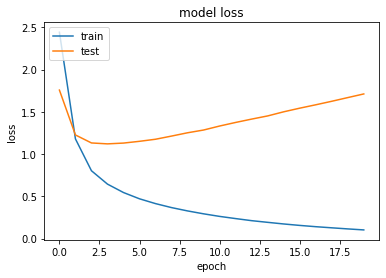

In [8]:
network_1 = models.Sequential()
network_1.add(layers.Dense(512, activation='relu', input_shape=(1000,)))
network_1.add(layers.Dense(20, activation='softmax'))

compile_train_plot_conf(network=network_1, train_x=X_train, train_y=train_labels_oneHot, test_x=X_test,
                        test_y=test_labels_oneHot)

Epoch 1/20
23/23 [==============================] - 2s 84ms/step - loss: 2.9863 - accuracy: 0.0710 - val_loss: 2.9079 - val_accuracy: 0.3879
Epoch 2/20
23/23 [==============================] - 2s 88ms/step - loss: 2.8525 - accuracy: 0.1617 - val_loss: 2.7089 - val_accuracy: 0.5072
Epoch 3/20
23/23 [==============================] - 2s 76ms/step - loss: 2.5615 - accuracy: 0.2782 - val_loss: 2.1228 - val_accuracy: 0.5339
Epoch 4/20
23/23 [==============================] - 2s 72ms/step - loss: 2.0276 - accuracy: 0.3914 - val_loss: 1.5777 - val_accuracy: 0.5805
Epoch 5/20
23/23 [==============================] - 2s 93ms/step - loss: 1.6575 - accuracy: 0.4811 - val_loss: 1.3507 - val_accuracy: 0.6139
Epoch 6/20
23/23 [==============================] - 2s 91ms/step - loss: 1.4013 - accuracy: 0.5558 - val_loss: 1.2441 - val_accuracy: 0.6314
Epoch 7/20
23/23 [==============================] - 2s 70ms/step - loss: 1.2638 - accuracy: 0.5992 - val_loss: 1.1943 - val_accuracy: 0.6352
Epoch 8/20
23

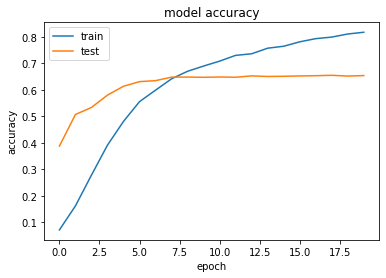

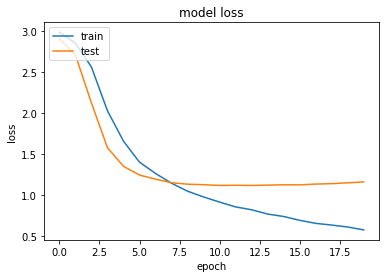

In [9]:
network_2 = models.Sequential()
network_2.add(
    layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=1), activation='relu', input_shape=(1000,)))
network_2.add(layers.Dropout(0.81))
network_2.add(layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=2), activation='relu'))
network_2.add(layers.Dropout(0.81))
network_2.add(layers.Dense(20, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4),
                           activation='softmax'))

compile_train_plot_conf(network=network_2, train_x=X_train, train_y=train_labels_oneHot, test_x=X_test,
                       test_y=test_labels_oneHot, batch_size=512)

Epoch 1/20
89/89 [==============================] - 4s 40ms/step - loss: 3.0267 - accuracy: 0.0536 - val_loss: 2.9820 - val_accuracy: 0.1442
Epoch 2/20
89/89 [==============================] - 3s 29ms/step - loss: 2.9877 - accuracy: 0.0650 - val_loss: 2.9647 - val_accuracy: 0.2504
Epoch 3/20
89/89 [==============================] - 3s 37ms/step - loss: 2.9189 - accuracy: 0.1032 - val_loss: 2.7328 - val_accuracy: 0.2924
Epoch 4/20
89/89 [==============================] - 3s 31ms/step - loss: 2.5384 - accuracy: 0.1927 - val_loss: 2.0784 - val_accuracy: 0.3651
Epoch 5/20
89/89 [==============================] - 3s 39ms/step - loss: 2.1220 - accuracy: 0.2873 - val_loss: 1.7634 - val_accuracy: 0.4433
Epoch 6/20
89/89 [==============================] - 3s 35ms/step - loss: 1.8269 - accuracy: 0.3773 - val_loss: 1.5478 - val_accuracy: 0.5195
Epoch 7/20
89/89 [==============================] - 3s 31ms/step - loss: 1.5999 - accuracy: 0.4461 - val_loss: 1.4346 - val_accuracy: 0.5465
Epoch 8/20
89

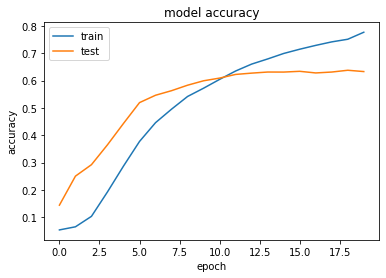

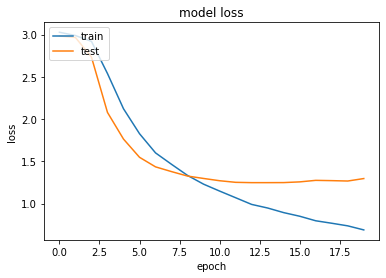

In [10]:
network_3 = models.Sequential()
network_3.add(
    layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=1), activation='relu', input_shape=(1000,)))
network_3.add(layers.Dropout(0.81))
network_3.add(layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=2), activation='relu'))
network_3.add(layers.Dropout(0.81))
network_3.add(layers.Dense(500, kernel_initializer=keras.initializers.he_normal(seed=3), activation='relu'))
network_3.add(layers.Dropout(0.81))
network_3.add(layers.Dense(20, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4),
                           activation='softmax'))

compile_train_plot_conf(network=network_3, train_x=X_train, train_y=train_labels_oneHot, test_x=X_test,
                       test_y=test_labels_oneHot)